In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import normalize
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pickle

In [2]:
def loadDataFiles():
    market_df = pickle.load(open('Market_train',"rb"))
    news_df = pickle.load(open("News_train", "rb"))
    print('Finished loading datafiles!')
    return market_df, news_df

In [3]:
def preprocess_data(mkt_df, news_df):
    mkt_df['time'] = pd.to_datetime(mkt_df['time'])
    news_df['time'] = pd.to_datetime(news_df['time'])
    mkt_df['time'] = mkt_df['time'].dt.date
    news_df['time'] = news_df['time'].dt.date
    assetCodes = []
    index = 0
    for x in news_df['assetCodes']:
        x = x.split(',')[0].split("'")[1]
        assetCodes.append(x)
    news_df['assetCode'] = np.asarray(assetCodes)
    irrelevantColumns = ['sourceTimestamp', 'firstCreated', 'sourceId', 
                         'headline', 'provider', 'subjects', 'audiences',
                        'headlineTag', 'marketCommentary', 'assetCodes', 'assetName']
    news_df.drop(irrelevantColumns, axis=1, inplace=True)
    mkt_df.drop(['assetName'], axis=1, inplace=True)
    modifiednews = news_df.groupby(['time','assetCode'], sort=False).aggregate(np.mean).reset_index()
    
    # join news reports to market data, note many assets will have many days without news data
    merged = pd.merge(mkt_df, modifiednews, how='left', on=['time', 'assetCode'], copy=False) 
    merged = merged.fillna(0)
    print('Finished preprocessing data!')
    return merged

In [4]:
market_data, news_data = loadDataFiles()

Finished loading datafiles!


In [5]:
X = preprocess_data(market_data, news_data)

Finished preprocessing data!


In [6]:
def normalizeY(ydf):
    ydf = (ydf + 1) / 2
    return ydf

In [7]:
X = X[X['returnsOpenNextMktres10'] >=-1]
X = X[X['returnsOpenNextMktres10'] <=1]

y = X['returnsOpenNextMktres10']

X.drop(['returnsOpenNextMktres10'], axis=1, inplace=True)
y = normalizeY(y)
assetCodesAndTime = X.iloc[:, :2]
X = X.iloc[:, 2:]

In [8]:
def regularize(df):
    for column in df:
        colmin = np.amin(df[column])
        colmax = np.amax(df[column])
        df[column] = (df[column] - colmin) / (colmax - colmin)
    return df

In [9]:
X = regularize(X)

In [10]:
def writeToJson(fileInput):
    file = open("input2.json", "w+")
    
    for index, row in fileInput.iterrows():
        writer = "["
        for i in range(len(row)):
            if(i == len(row)-1):
                writer += str(row[i])
            else:
                writer += str(row[i]) + ", "
        writer += "]\n"
        file.write(writer)
    
    file.close()

In [60]:
writeToJson(X.iloc[round(len(X) * 0.7):round(len(X) * 0.7) + 10000, :])

Row 2851177 completed
Row 2851178 completed
Row 2851179 completed
Row 2851180 completed
Row 2851181 completed
Row 2851182 completed
Row 2851183 completed
Row 2851184 completed
Row 2851185 completed
Row 2851186 completed
Row 2851187 completed
Row 2851188 completed
Row 2851189 completed
Row 2851190 completed
Row 2851191 completed
Row 2851192 completed
Row 2851193 completed
Row 2851194 completed
Row 2851195 completed
Row 2851196 completed
Row 2851197 completed
Row 2851198 completed
Row 2851199 completed
Row 2851200 completed
Row 2851201 completed
Row 2851202 completed
Row 2851203 completed
Row 2851204 completed
Row 2851205 completed
Row 2851206 completed
Row 2851207 completed
Row 2851208 completed
Row 2851209 completed
Row 2851210 completed
Row 2851211 completed
Row 2851212 completed
Row 2851213 completed
Row 2851214 completed
Row 2851215 completed
Row 2851216 completed
Row 2851217 completed
Row 2851218 completed
Row 2851219 completed
Row 2851220 completed
Row 2851221 completed
Row 285122

Row 2851648 completed
Row 2851649 completed
Row 2851650 completed
Row 2851651 completed
Row 2851652 completed
Row 2851653 completed
Row 2851654 completed
Row 2851655 completed
Row 2851656 completed
Row 2851657 completed
Row 2851658 completed
Row 2851659 completed
Row 2851660 completed
Row 2851661 completed
Row 2851662 completed
Row 2851663 completed
Row 2851664 completed
Row 2851665 completed
Row 2851666 completed
Row 2851667 completed
Row 2851668 completed
Row 2851669 completed
Row 2851670 completed
Row 2851671 completed
Row 2851672 completed
Row 2851673 completed
Row 2851674 completed
Row 2851675 completed
Row 2851676 completed
Row 2851677 completed
Row 2851678 completed
Row 2851679 completed
Row 2851680 completed
Row 2851681 completed
Row 2851682 completed
Row 2851683 completed
Row 2851684 completed
Row 2851685 completed
Row 2851686 completed
Row 2851687 completed
Row 2851688 completed
Row 2851689 completed
Row 2851690 completed
Row 2851691 completed
Row 2851692 completed
Row 285169

Row 2852089 completed
Row 2852090 completed
Row 2852091 completed
Row 2852092 completed
Row 2852093 completed
Row 2852094 completed
Row 2852095 completed
Row 2852096 completed
Row 2852097 completed
Row 2852098 completed
Row 2852099 completed
Row 2852100 completed
Row 2852101 completed
Row 2852102 completed
Row 2852103 completed
Row 2852104 completed
Row 2852105 completed
Row 2852106 completed
Row 2852107 completed
Row 2852108 completed
Row 2852109 completed
Row 2852110 completed
Row 2852111 completed
Row 2852112 completed
Row 2852113 completed
Row 2852114 completed
Row 2852115 completed
Row 2852116 completed
Row 2852117 completed
Row 2852118 completed
Row 2852119 completed
Row 2852120 completed
Row 2852121 completed
Row 2852122 completed
Row 2852123 completed
Row 2852124 completed
Row 2852125 completed
Row 2852126 completed
Row 2852127 completed
Row 2852128 completed
Row 2852129 completed
Row 2852130 completed
Row 2852131 completed
Row 2852132 completed
Row 2852133 completed
Row 285213

Row 2852602 completed
Row 2852603 completed
Row 2852604 completed
Row 2852605 completed
Row 2852606 completed
Row 2852607 completed
Row 2852608 completed
Row 2852609 completed
Row 2852610 completed
Row 2852611 completed
Row 2852612 completed
Row 2852613 completed
Row 2852614 completed
Row 2852615 completed
Row 2852616 completed
Row 2852617 completed
Row 2852618 completed
Row 2852619 completed
Row 2852620 completed
Row 2852621 completed
Row 2852622 completed
Row 2852623 completed
Row 2852624 completed
Row 2852625 completed
Row 2852626 completed
Row 2852627 completed
Row 2852628 completed
Row 2852629 completed
Row 2852630 completed
Row 2852631 completed
Row 2852632 completed
Row 2852633 completed
Row 2852634 completed
Row 2852635 completed
Row 2852636 completed
Row 2852637 completed
Row 2852638 completed
Row 2852639 completed
Row 2852640 completed
Row 2852641 completed
Row 2852642 completed
Row 2852643 completed
Row 2852644 completed
Row 2852645 completed
Row 2852646 completed
Row 285264

Row 2853234 completed
Row 2853235 completed
Row 2853236 completed
Row 2853237 completed
Row 2853238 completed
Row 2853239 completed
Row 2853240 completed
Row 2853241 completed
Row 2853242 completed
Row 2853243 completed
Row 2853244 completed
Row 2853245 completed
Row 2853246 completed
Row 2853247 completed
Row 2853248 completed
Row 2853249 completed
Row 2853250 completed
Row 2853251 completed
Row 2853252 completed
Row 2853253 completed
Row 2853254 completed
Row 2853255 completed
Row 2853256 completed
Row 2853257 completed
Row 2853258 completed
Row 2853259 completed
Row 2853260 completed
Row 2853261 completed
Row 2853262 completed
Row 2853263 completed
Row 2853264 completed
Row 2853265 completed
Row 2853266 completed
Row 2853267 completed
Row 2853268 completed
Row 2853269 completed
Row 2853270 completed
Row 2853271 completed
Row 2853272 completed
Row 2853273 completed
Row 2853274 completed
Row 2853275 completed
Row 2853276 completed
Row 2853277 completed
Row 2853278 completed
Row 285327

Row 2853649 completed
Row 2853650 completed
Row 2853651 completed
Row 2853652 completed
Row 2853653 completed
Row 2853654 completed
Row 2853655 completed
Row 2853656 completed
Row 2853657 completed
Row 2853658 completed
Row 2853659 completed
Row 2853660 completed
Row 2853661 completed
Row 2853662 completed
Row 2853663 completed
Row 2853664 completed
Row 2853665 completed
Row 2853666 completed
Row 2853667 completed
Row 2853668 completed
Row 2853669 completed
Row 2853670 completed
Row 2853671 completed
Row 2853672 completed
Row 2853673 completed
Row 2853674 completed
Row 2853675 completed
Row 2853676 completed
Row 2853677 completed
Row 2853678 completed
Row 2853679 completed
Row 2853680 completed
Row 2853681 completed
Row 2853682 completed
Row 2853683 completed
Row 2853684 completed
Row 2853685 completed
Row 2853686 completed
Row 2853687 completed
Row 2853688 completed
Row 2853689 completed
Row 2853690 completed
Row 2853691 completed
Row 2853692 completed
Row 2853693 completed
Row 285369

Row 2854255 completed
Row 2854256 completed
Row 2854257 completed
Row 2854258 completed
Row 2854259 completed
Row 2854260 completed
Row 2854261 completed
Row 2854262 completed
Row 2854263 completed
Row 2854264 completed
Row 2854265 completed
Row 2854266 completed
Row 2854267 completed
Row 2854268 completed
Row 2854269 completed
Row 2854270 completed
Row 2854271 completed
Row 2854272 completed
Row 2854273 completed
Row 2854274 completed
Row 2854275 completed
Row 2854276 completed
Row 2854277 completed
Row 2854278 completed
Row 2854279 completed
Row 2854280 completed
Row 2854281 completed
Row 2854282 completed
Row 2854283 completed
Row 2854284 completed
Row 2854285 completed
Row 2854286 completed
Row 2854287 completed
Row 2854288 completed
Row 2854289 completed
Row 2854290 completed
Row 2854291 completed
Row 2854292 completed
Row 2854293 completed
Row 2854294 completed
Row 2854295 completed
Row 2854296 completed
Row 2854297 completed
Row 2854298 completed
Row 2854299 completed
Row 285430

Row 2854724 completed
Row 2854725 completed
Row 2854726 completed
Row 2854727 completed
Row 2854728 completed
Row 2854729 completed
Row 2854730 completed
Row 2854731 completed
Row 2854732 completed
Row 2854733 completed
Row 2854734 completed
Row 2854735 completed
Row 2854736 completed
Row 2854737 completed
Row 2854738 completed
Row 2854739 completed
Row 2854740 completed
Row 2854741 completed
Row 2854742 completed
Row 2854743 completed
Row 2854744 completed
Row 2854745 completed
Row 2854746 completed
Row 2854747 completed
Row 2854748 completed
Row 2854749 completed
Row 2854750 completed
Row 2854751 completed
Row 2854752 completed
Row 2854753 completed
Row 2854754 completed
Row 2854755 completed
Row 2854756 completed
Row 2854757 completed
Row 2854758 completed
Row 2854759 completed
Row 2854760 completed
Row 2854761 completed
Row 2854762 completed
Row 2854763 completed
Row 2854764 completed
Row 2854765 completed
Row 2854766 completed
Row 2854767 completed
Row 2854768 completed
Row 285476

Row 2855211 completed
Row 2855212 completed
Row 2855213 completed
Row 2855214 completed
Row 2855215 completed
Row 2855216 completed
Row 2855217 completed
Row 2855218 completed
Row 2855219 completed
Row 2855220 completed
Row 2855221 completed
Row 2855222 completed
Row 2855223 completed
Row 2855224 completed
Row 2855225 completed
Row 2855226 completed
Row 2855227 completed
Row 2855228 completed
Row 2855229 completed
Row 2855230 completed
Row 2855231 completed
Row 2855232 completed
Row 2855233 completed
Row 2855234 completed
Row 2855235 completed
Row 2855236 completed
Row 2855237 completed
Row 2855238 completed
Row 2855239 completed
Row 2855240 completed
Row 2855241 completed
Row 2855242 completed
Row 2855243 completed
Row 2855244 completed
Row 2855245 completed
Row 2855246 completed
Row 2855247 completed
Row 2855248 completed
Row 2855249 completed
Row 2855250 completed
Row 2855251 completed
Row 2855252 completed
Row 2855253 completed
Row 2855254 completed
Row 2855255 completed
Row 285525

Row 2855677 completed
Row 2855678 completed
Row 2855679 completed
Row 2855680 completed
Row 2855681 completed
Row 2855682 completed
Row 2855683 completed
Row 2855684 completed
Row 2855685 completed
Row 2855686 completed
Row 2855687 completed
Row 2855688 completed
Row 2855689 completed
Row 2855690 completed
Row 2855691 completed
Row 2855692 completed
Row 2855693 completed
Row 2855694 completed
Row 2855695 completed
Row 2855696 completed
Row 2855697 completed
Row 2855698 completed
Row 2855699 completed
Row 2855700 completed
Row 2855701 completed
Row 2855702 completed
Row 2855703 completed
Row 2855704 completed
Row 2855705 completed
Row 2855706 completed
Row 2855707 completed
Row 2855708 completed
Row 2855709 completed
Row 2855710 completed
Row 2855711 completed
Row 2855712 completed
Row 2855713 completed
Row 2855714 completed
Row 2855715 completed
Row 2855716 completed
Row 2855717 completed
Row 2855718 completed
Row 2855719 completed
Row 2855720 completed
Row 2855721 completed
Row 285572

Row 2856327 completed
Row 2856328 completed
Row 2856329 completed
Row 2856330 completed
Row 2856331 completed
Row 2856332 completed
Row 2856333 completed
Row 2856334 completed
Row 2856335 completed
Row 2856336 completed
Row 2856337 completed
Row 2856338 completed
Row 2856339 completed
Row 2856340 completed
Row 2856341 completed
Row 2856342 completed
Row 2856343 completed
Row 2856344 completed
Row 2856345 completed
Row 2856346 completed
Row 2856347 completed
Row 2856348 completed
Row 2856349 completed
Row 2856350 completed
Row 2856351 completed
Row 2856352 completed
Row 2856353 completed
Row 2856354 completed
Row 2856355 completed
Row 2856356 completed
Row 2856357 completed
Row 2856358 completed
Row 2856359 completed
Row 2856360 completed
Row 2856361 completed
Row 2856362 completed
Row 2856363 completed
Row 2856364 completed
Row 2856365 completed
Row 2856366 completed
Row 2856367 completed
Row 2856368 completed
Row 2856369 completed
Row 2856370 completed
Row 2856371 completed
Row 285637

Row 2856715 completed
Row 2856716 completed
Row 2856717 completed
Row 2856718 completed
Row 2856719 completed
Row 2856720 completed
Row 2856721 completed
Row 2856722 completed
Row 2856723 completed
Row 2856724 completed
Row 2856725 completed
Row 2856726 completed
Row 2856727 completed
Row 2856728 completed
Row 2856729 completed
Row 2856730 completed
Row 2856731 completed
Row 2856732 completed
Row 2856733 completed
Row 2856734 completed
Row 2856735 completed
Row 2856736 completed
Row 2856737 completed
Row 2856738 completed
Row 2856739 completed
Row 2856740 completed
Row 2856741 completed
Row 2856742 completed
Row 2856743 completed
Row 2856744 completed
Row 2856745 completed
Row 2856746 completed
Row 2856747 completed
Row 2856748 completed
Row 2856749 completed
Row 2856750 completed
Row 2856751 completed
Row 2856752 completed
Row 2856753 completed
Row 2856754 completed
Row 2856755 completed
Row 2856756 completed
Row 2856757 completed
Row 2856758 completed
Row 2856759 completed
Row 285676

Row 2857234 completed
Row 2857235 completed
Row 2857236 completed
Row 2857237 completed
Row 2857238 completed
Row 2857239 completed
Row 2857240 completed
Row 2857241 completed
Row 2857242 completed
Row 2857243 completed
Row 2857244 completed
Row 2857245 completed
Row 2857246 completed
Row 2857247 completed
Row 2857248 completed
Row 2857249 completed
Row 2857250 completed
Row 2857251 completed
Row 2857252 completed
Row 2857253 completed
Row 2857254 completed
Row 2857255 completed
Row 2857256 completed
Row 2857257 completed
Row 2857258 completed
Row 2857259 completed
Row 2857260 completed
Row 2857261 completed
Row 2857262 completed
Row 2857263 completed
Row 2857264 completed
Row 2857265 completed
Row 2857266 completed
Row 2857267 completed
Row 2857268 completed
Row 2857269 completed
Row 2857270 completed
Row 2857271 completed
Row 2857272 completed
Row 2857273 completed
Row 2857274 completed
Row 2857275 completed
Row 2857276 completed
Row 2857277 completed
Row 2857278 completed
Row 285727

Row 2857750 completed
Row 2857751 completed
Row 2857752 completed
Row 2857753 completed
Row 2857754 completed
Row 2857755 completed
Row 2857756 completed
Row 2857757 completed
Row 2857758 completed
Row 2857759 completed
Row 2857760 completed
Row 2857761 completed
Row 2857762 completed
Row 2857763 completed
Row 2857764 completed
Row 2857765 completed
Row 2857766 completed
Row 2857767 completed
Row 2857768 completed
Row 2857769 completed
Row 2857770 completed
Row 2857771 completed
Row 2857772 completed
Row 2857773 completed
Row 2857774 completed
Row 2857775 completed
Row 2857776 completed
Row 2857777 completed
Row 2857778 completed
Row 2857779 completed
Row 2857780 completed
Row 2857781 completed
Row 2857782 completed
Row 2857783 completed
Row 2857784 completed
Row 2857785 completed
Row 2857786 completed
Row 2857787 completed
Row 2857788 completed
Row 2857789 completed
Row 2857790 completed
Row 2857791 completed
Row 2857792 completed
Row 2857793 completed
Row 2857794 completed
Row 285779

Row 2858234 completed
Row 2858235 completed
Row 2858236 completed
Row 2858237 completed
Row 2858238 completed
Row 2858239 completed
Row 2858240 completed
Row 2858241 completed
Row 2858242 completed
Row 2858243 completed
Row 2858244 completed
Row 2858245 completed
Row 2858246 completed
Row 2858247 completed
Row 2858248 completed
Row 2858249 completed
Row 2858250 completed
Row 2858251 completed
Row 2858252 completed
Row 2858253 completed
Row 2858254 completed
Row 2858255 completed
Row 2858256 completed
Row 2858257 completed
Row 2858258 completed
Row 2858259 completed
Row 2858260 completed
Row 2858261 completed
Row 2858262 completed
Row 2858263 completed
Row 2858264 completed
Row 2858265 completed
Row 2858266 completed
Row 2858267 completed
Row 2858268 completed
Row 2858269 completed
Row 2858270 completed
Row 2858271 completed
Row 2858272 completed
Row 2858273 completed
Row 2858274 completed
Row 2858275 completed
Row 2858276 completed
Row 2858277 completed
Row 2858278 completed
Row 285827

Row 2858653 completed
Row 2858654 completed
Row 2858655 completed
Row 2858656 completed
Row 2858657 completed
Row 2858658 completed
Row 2858659 completed
Row 2858660 completed
Row 2858661 completed
Row 2858662 completed
Row 2858663 completed
Row 2858664 completed
Row 2858665 completed
Row 2858666 completed
Row 2858667 completed
Row 2858668 completed
Row 2858669 completed
Row 2858670 completed
Row 2858671 completed
Row 2858672 completed
Row 2858673 completed
Row 2858674 completed
Row 2858675 completed
Row 2858676 completed
Row 2858677 completed
Row 2858678 completed
Row 2858679 completed
Row 2858680 completed
Row 2858681 completed
Row 2858682 completed
Row 2858683 completed
Row 2858684 completed
Row 2858685 completed
Row 2858686 completed
Row 2858687 completed
Row 2858688 completed
Row 2858689 completed
Row 2858690 completed
Row 2858691 completed
Row 2858692 completed
Row 2858693 completed
Row 2858694 completed
Row 2858695 completed
Row 2858696 completed
Row 2858697 completed
Row 285869

Row 2859225 completed
Row 2859226 completed
Row 2859227 completed
Row 2859228 completed
Row 2859229 completed
Row 2859230 completed
Row 2859231 completed
Row 2859232 completed
Row 2859233 completed
Row 2859234 completed
Row 2859235 completed
Row 2859236 completed
Row 2859237 completed
Row 2859238 completed
Row 2859239 completed
Row 2859240 completed
Row 2859241 completed
Row 2859242 completed
Row 2859243 completed
Row 2859244 completed
Row 2859245 completed
Row 2859246 completed
Row 2859247 completed
Row 2859248 completed
Row 2859249 completed
Row 2859250 completed
Row 2859251 completed
Row 2859252 completed
Row 2859253 completed
Row 2859254 completed
Row 2859255 completed
Row 2859256 completed
Row 2859257 completed
Row 2859258 completed
Row 2859259 completed
Row 2859260 completed
Row 2859261 completed
Row 2859262 completed
Row 2859263 completed
Row 2859264 completed
Row 2859265 completed
Row 2859266 completed
Row 2859267 completed
Row 2859268 completed
Row 2859269 completed
Row 285927

Row 2859709 completed
Row 2859710 completed
Row 2859711 completed
Row 2859712 completed
Row 2859713 completed
Row 2859714 completed
Row 2859715 completed
Row 2859716 completed
Row 2859717 completed
Row 2859718 completed
Row 2859719 completed
Row 2859720 completed
Row 2859721 completed
Row 2859722 completed
Row 2859723 completed
Row 2859724 completed
Row 2859725 completed
Row 2859726 completed
Row 2859727 completed
Row 2859728 completed
Row 2859729 completed
Row 2859730 completed
Row 2859731 completed
Row 2859732 completed
Row 2859733 completed
Row 2859734 completed
Row 2859735 completed
Row 2859736 completed
Row 2859737 completed
Row 2859738 completed
Row 2859739 completed
Row 2859740 completed
Row 2859741 completed
Row 2859742 completed
Row 2859743 completed
Row 2859744 completed
Row 2859745 completed
Row 2859746 completed
Row 2859747 completed
Row 2859748 completed
Row 2859749 completed
Row 2859750 completed
Row 2859751 completed
Row 2859752 completed
Row 2859753 completed
Row 285975

Row 2860203 completed
Row 2860204 completed
Row 2860205 completed
Row 2860206 completed
Row 2860207 completed
Row 2860208 completed
Row 2860209 completed
Row 2860210 completed
Row 2860211 completed
Row 2860212 completed
Row 2860213 completed
Row 2860214 completed
Row 2860215 completed
Row 2860216 completed
Row 2860217 completed
Row 2860218 completed
Row 2860219 completed
Row 2860220 completed
Row 2860221 completed
Row 2860222 completed
Row 2860223 completed
Row 2860224 completed
Row 2860225 completed
Row 2860226 completed
Row 2860227 completed
Row 2860228 completed
Row 2860229 completed
Row 2860230 completed
Row 2860231 completed
Row 2860232 completed
Row 2860233 completed
Row 2860234 completed
Row 2860235 completed
Row 2860236 completed
Row 2860237 completed
Row 2860238 completed
Row 2860239 completed
Row 2860240 completed
Row 2860241 completed
Row 2860242 completed
Row 2860243 completed
Row 2860244 completed
Row 2860245 completed
Row 2860246 completed
Row 2860247 completed
Row 286024

Row 2860729 completed
Row 2860730 completed
Row 2860731 completed
Row 2860732 completed
Row 2860733 completed
Row 2860734 completed
Row 2860735 completed
Row 2860736 completed
Row 2860737 completed
Row 2860738 completed
Row 2860739 completed
Row 2860740 completed
Row 2860741 completed
Row 2860742 completed
Row 2860743 completed
Row 2860744 completed
Row 2860745 completed
Row 2860746 completed
Row 2860747 completed
Row 2860748 completed
Row 2860749 completed
Row 2860750 completed
Row 2860751 completed
Row 2860752 completed
Row 2860753 completed
Row 2860754 completed
Row 2860755 completed
Row 2860756 completed
Row 2860757 completed
Row 2860758 completed
Row 2860759 completed
Row 2860760 completed
Row 2860761 completed
Row 2860762 completed
Row 2860763 completed
Row 2860764 completed
Row 2860765 completed
Row 2860766 completed
Row 2860767 completed
Row 2860768 completed
Row 2860769 completed
Row 2860770 completed
Row 2860771 completed
Row 2860772 completed
Row 2860773 completed
Row 286077

In [10]:
actual = list(y.iloc[round(len(X) * 0.7):])

In [11]:
predictions = [line.strip() for line in open("output.txt", 'r')]
predictions = predictions[0]
predictions = predictions[1:len(predictions)-1]

predictions = np.fromstring(predictions, dtype=float, sep=',')

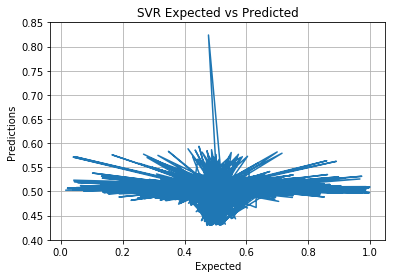

In [15]:
plt.ylim([0.4, 0.85])
plt.grid()
plt.xlabel('Expected')
plt.ylabel('Predictions')
plt.title('SVR Expected vs Predicted')
plt.plot(actual, predictions)

In [19]:
def MAE(predictions, actual):
    abs_err = [abs(prediction - actualVal) for prediction, actualVal in zip(predictions,actual)]
    mae = sum(abs_err)/len(actual)
    return mae

In [20]:
print(MAE(predictions, actual))

0.022387407984064883
